In [1]:
import torch
from math import cos,sin,radians,sqrt
import random
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

In [2]:
np_pointcloud = np.load('data/ShapeNet/02691156/10155655850468db78d106ce0a280f87/pointcloud.npz')

In [3]:
print(np_pointcloud.files)

np_pointcloud['points'].shape

['points', 'normals', 'loc', 'scale']


(100000, 3)

In [4]:
## https://en.wikipedia.org/wiki/Rotation_matrix
angle_range = 45
x_angle = radians(random.random() * angle_range)
y_angle = radians(random.random() * angle_range)
z_angle = radians(random.random() * angle_range)

print(x_angle,y_angle, z_angle)
rot_x = torch.Tensor([[1,0,0,0],[0, cos(x_angle),-sin(x_angle),0], [0, sin(x_angle), cos(x_angle),0], [0,0,0,1]])
rot_y = torch.Tensor([[cos(y_angle),0,sin(y_angle), 0],[0, 1, 0,0], [-sin(y_angle),0,cos(y_angle),0], [0,0,0,1]])
rot_z = torch.Tensor([[cos(z_angle), -sin(z_angle),0,0],[sin(z_angle), cos(z_angle),0,0],[0,0,1,0], [0,0,0,1]])

0.6367545795712656 0.6701970552759726 0.05212934743375189


In [5]:
print(rot_x)
print(rot_y)
print(rot_z)

tensor([[ 1.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.8040, -0.5946,  0.0000],
        [ 0.0000,  0.5946,  0.8040,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  1.0000]])
tensor([[ 0.7837,  0.0000,  0.6211,  0.0000],
        [ 0.0000,  1.0000,  0.0000,  0.0000],
        [-0.6211,  0.0000,  0.7837,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  1.0000]])
tensor([[ 0.9986, -0.0521,  0.0000,  0.0000],
        [ 0.0521,  0.9986,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  1.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  1.0000]])


In [6]:
torch.max(torch.randn(2000,1))

tensor(3.8461)

In [9]:
## pointcloud 

# pointcloud_model = (torch.rand((2000,3)) - 0.5) * 2
# pointcloud_model = torch.randn((2000,3))
pointcloud_model = torch.Tensor(np_pointcloud['points'])
pointcloud_model = pointcloud_model / sqrt(0.75) ## putting to unit circle
n,_ = pointcloud_model.shape
pointcloud_model = torch.cat([pointcloud_model, torch.ones(n,1)], dim = 1)

rotation_matrix = torch.mm(rot_y, rot_z)
rotation_matrix = torch.mm(rotation_matrix, rot_x)
pointcloud_model_rotated = torch.mm(pointcloud_model, rotation_matrix)
# pointcloud_model_rotated = torch.mm(pointcloud_model, rot_x)
# pointcloud_model_rotated = torch.mm(pointcloud_model_rotated, rot_y)
# pointcloud_model_rotated = torch.mm(pointcloud_model_rotated, rot_z)

In [10]:
rotation_matrix

tensor([[ 0.7826,  0.3365,  0.5237,  0.0000],
        [ 0.0521,  0.8029, -0.5938,  0.0000],
        [-0.6203,  0.4920,  0.6109,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  1.0000]])

In [11]:
print(pointcloud_model_rotated.shape, pointcloud_model_rotated[:,3].shape)
pointcloud_model_rotated = torch.t(torch.t(pointcloud_model_rotated) / pointcloud_model_rotated[:,3])

torch.Size([100000, 4]) torch.Size([100000])


In [12]:
pointcloud_model_rotated

tensor([[-0.1107, -0.0217,  0.0919,  1.0000],
        [-0.0526, -0.0704, -0.1009,  1.0000],
        [ 0.1479,  0.1189,  0.1418,  1.0000],
        ...,
        [-0.0862,  0.0279,  0.1874,  1.0000],
        [-0.3921, -0.0742, -0.3547,  1.0000],
        [ 0.1807, -0.0196,  0.2289,  1.0000]])

In [13]:
print(torch.max(pointcloud_model_rotated))
print(torch.max(pointcloud_model))

tensor(1.)
tensor(1.)


0.13287801612818345 0.1024131539555486 0.08562324040904186
torch.Size([100000, 4]) torch.Size([100000, 4])


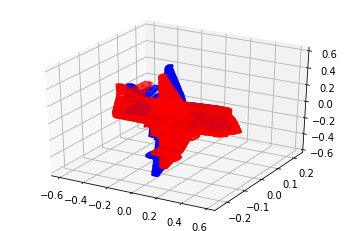

In [14]:
## https://en.wikipedia.org/wiki/Rotation_matrix
angle_range = 15
x_angle = radians(random.random() * angle_range)
y_angle = radians(random.random() * angle_range)
z_angle = radians(random.random() * angle_range)

print(x_angle,y_angle, z_angle)
rot_x = torch.Tensor([[1,0,0,0],[0, cos(x_angle),-sin(x_angle),0], [0, sin(x_angle), cos(x_angle),0], [0,0,0,1]])
rot_y = torch.Tensor([[cos(y_angle),0,sin(y_angle), 0],[0, 1, 0,0], [-sin(y_angle),0,cos(y_angle),0], [0,0,0,1]])
rot_z = torch.Tensor([[cos(z_angle), -sin(z_angle),0,0],[sin(z_angle), cos(z_angle),0,0],[0,0,1,0], [0,0,0,1]])

rotation_matrix = torch.mm(rot_y, rot_z)
rotation_matrix = torch.mm(rotation_matrix, rot_x)
pointcloud_model_rotated = torch.mm(pointcloud_model, rotation_matrix)
pointcloud_model_rotated = torch.t(torch.t(pointcloud_model_rotated) / pointcloud_model_rotated[:,3])

fig = plt.figure()
ax = plt.axes(projection='3d')
print(pointcloud_model.shape, pointcloud_model_rotated.shape)
ax.scatter(pointcloud_model[:,0],pointcloud_model[:,1], pointcloud_model[:,2], color = 'red', s=0.01)
ax.scatter(pointcloud_model_rotated[:,0],pointcloud_model_rotated[:,1], pointcloud_model_rotated[:,2], color = 'blue', s=0.01)

In [181]:
for i in range(100):

    ## pointcloud 

#     pointcloud_model = (torch.rand((2000,3)) - 0.5) * 2
    pointcloud_model = torch.randn((2000,3))
    
#     pointcloud_model = pointcloud_model / sqrt(3)
#     pointcloud_model = torch.cat([pointcloud_model, torch.ones(2000,1)], dim = 1)

#     rotation_matrix = torch.mm(rot_y, rot_z)
#     rotation_matrix = torch.mm(rotation_matrix, rot_x)
#     pointcloud_model_rotated = torch.mm(pointcloud_model, rotation_matrix)
    
    pointcloud_model_rotated = rotate_points(pointcloud_model)
    
    print(torch.max(pointcloud_model_rotated), torch.min(pointcloud_model_rotated))
    print(torch.max(pointcloud_model),torch.min(pointcloud_model))
    print('_______________________________________-')

0.4157806574354268 0.6007880094939143 0.1507193481321593
tensor(2.0320) tensor(-2.1097)
tensor(3.4740) tensor(-3.9317)
_______________________________________-
0.33958013860051955 0.132870312784968 0.11098859010097283
tensor(2.2119) tensor(-2.2214)
tensor(3.9463) tensor(-3.6277)
_______________________________________-
0.174868666575424 0.46007300813235635 0.128766794198037
tensor(2.2998) tensor(-2.0830)
tensor(4.0479) tensor(-3.4816)
_______________________________________-
0.7443811692657205 0.43044995602566194 0.5041562754761526
tensor(2.1071) tensor(-2.0169)
tensor(3.7282) tensor(-3.7689)
_______________________________________-
0.5790897023676129 0.7471969598882316 0.6581287608591435
tensor(1.9743) tensor(-1.9588)
tensor(3.7875) tensor(-3.5472)
_______________________________________-
0.6000731926398415 0.19536721188084533 0.3190042153597119
tensor(2.3138) tensor(-2.1618)
tensor(3.3387) tensor(-3.8339)
_______________________________________-
0.06641918408025142 0.0679521605920388

In [180]:
def rotate_points(pointcloud_model):
        ## https://en.wikipedia.org/wiki/Rotation_matrix
    angle_range = 45
    x_angle = radians(random.random() * angle_range)
    y_angle = radians(random.random() * angle_range)
    z_angle = radians(random.random() * angle_range)

    print(x_angle,y_angle, z_angle)
    rot_x = torch.Tensor([[1,0,0,0],[0, cos(x_angle),-sin(x_angle),0], [0, sin(x_angle), cos(x_angle),0], [0,0,0,1]])
    rot_y = torch.Tensor([[cos(y_angle),0,sin(y_angle), 0],[0, 1, 0,0], [-sin(y_angle),0,cos(y_angle),0], [0,0,0,1]])
    rot_z = torch.Tensor([[cos(z_angle), -sin(z_angle),0,0],[sin(z_angle), cos(z_angle),0,0],[0,0,1,0], [0,0,0,1]])
    
    pointcloud_model = pointcloud_model / sqrt(3)
    pointcloud_model = torch.cat([pointcloud_model, torch.ones(2000,1)], dim = 1)
    
    rotation_matrix = torch.mm(rot_y, rot_z)
    rotation_matrix = torch.mm(rotation_matrix, rot_x)
    pointcloud_model_rotated = torch.mm(pointcloud_model, rotation_matrix)
    
    return pointcloud_model_rotated